## Model Evaluation and Refinement

<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>

In [50]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [51]:
#Read the data and use only numeric data
df = pd.read_csv('car_clean.csv')
df = df._get_numeric_data()
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,5000.0,21,27,13495.0,11.190476,8.703704,False,True,True,False
1,1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,5000.0,21,27,16500.0,11.190476,8.703704,False,True,True,False
2,2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,...,5000.0,19,26,16500.0,12.368421,9.038462,False,True,True,False
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,...,5500.0,24,30,13950.0,9.791667,7.833333,False,True,True,False
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,...,5500.0,18,22,17450.0,13.055556,10.681818,False,True,True,False


In [52]:
#Library for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

## Functions for plotting

In [92]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [54]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

In [55]:
#Place the target data price in a seperate dataframe y_data
y_data = df['price']

In [56]:
#Drop price data in dataframe x_data
x_data = df.drop('price', axis= 1)

In [57]:
#Split the data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.10, random_state= 1)

print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  21
number of training samples:  180


In [58]:
#Create a Linear Regression Object
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [59]:
#Fit the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [60]:
#Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.36339478087886823

In [61]:
#Calculate the R^2 on the training data
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

## Cross-Validation Score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

In [64]:
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [65]:
#Find the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are 0.5222467481979471 and the standard deviation is 0.29176230741826353


In [66]:
#Use negative squared error as a score
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20240865.23167855, 43737944.37864214, 12470270.77569641,
       17574447.8797166 ])

In [67]:
from sklearn.model_selection import cross_val_predict

In [68]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv= 4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

## Part 2: Overfitting, Underfitting and Model Selection

In [69]:
#Create Multiple Linear Regression objects and train the model
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [70]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7425.12006788, 28327.02313301, 14210.29915814,  4054.61292262,
       34498.57562361])

In [71]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

Let's examine the distribution of the predicted values of the training data

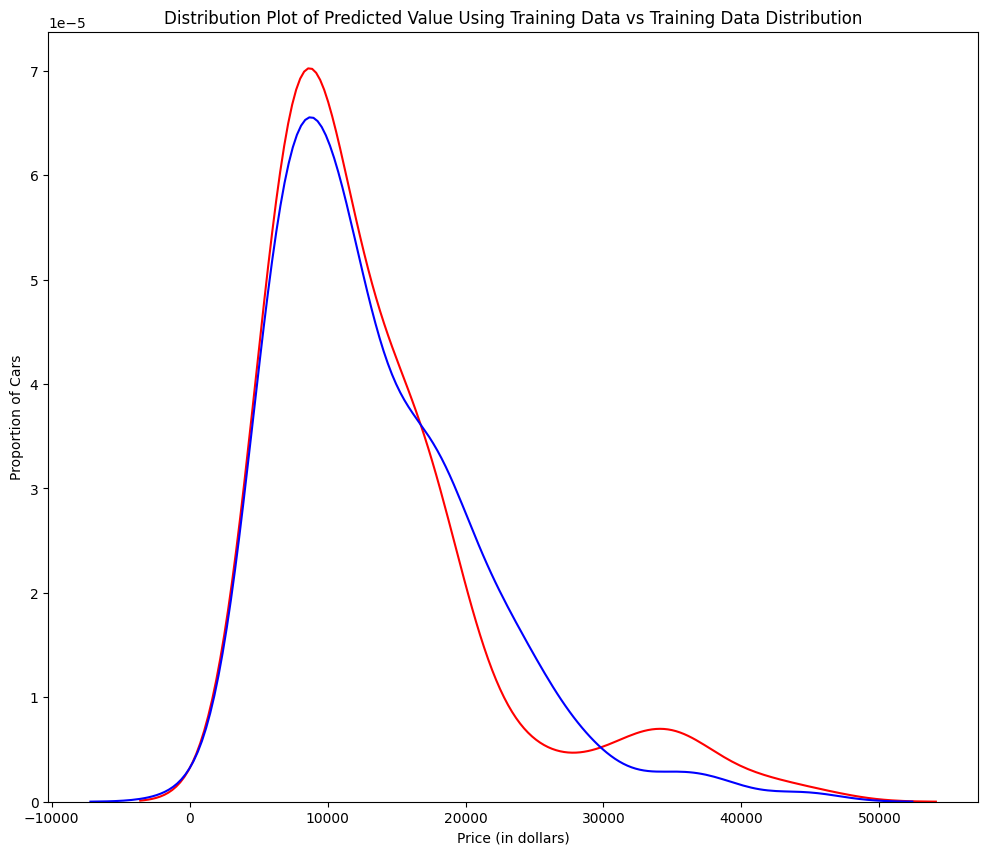

In [72]:
Title = "Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data. 

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

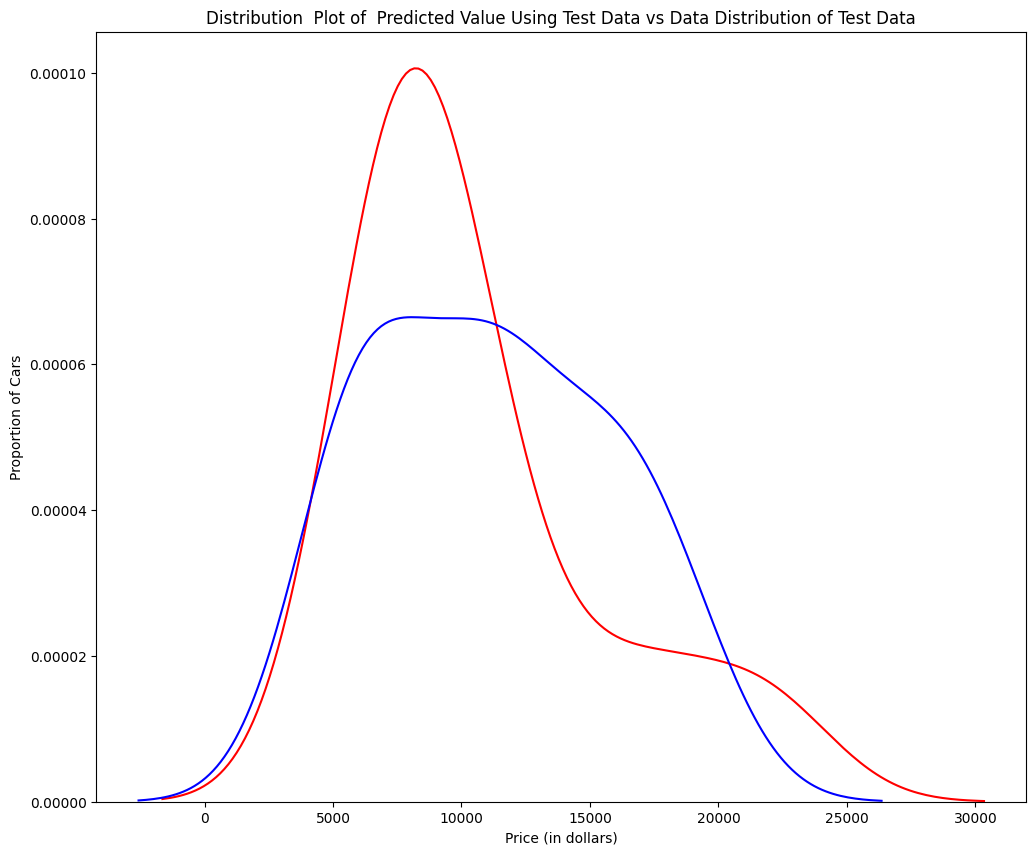

In [73]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data. 

<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
#Use 55 percent of the data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.45, random_state= 0)

In [76]:
#Perform a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree= 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [77]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [78]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6722.97881798,  7301.51125999, 12214.21320532, 18901.4904913 ,
       20000.01535382])

In [79]:
print("Predicted values: ", yhat[0:4])
print("True values: ", y_test[0:4].values)

Predicted values:  [ 6722.97881798  7301.51125999 12214.21320532 18901.4904913 ]
True values:  [ 6295. 10698. 13860. 13499.]


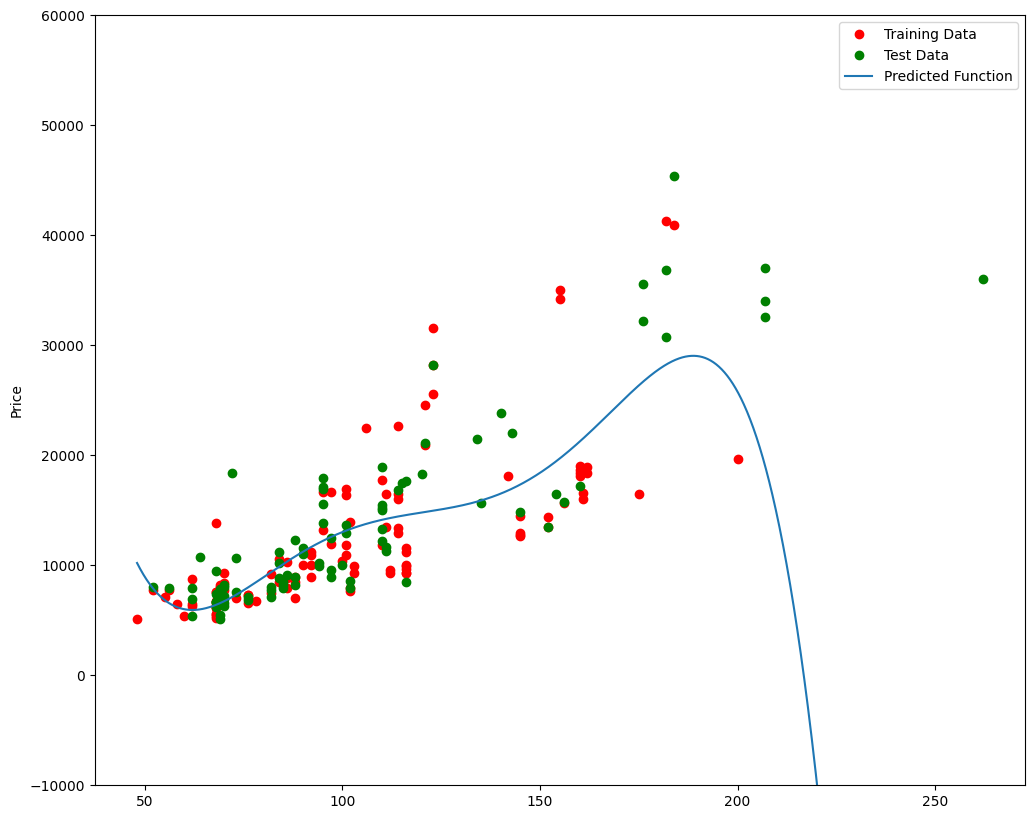

In [80]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [81]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5571757383573005

In [82]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.624874961863018

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

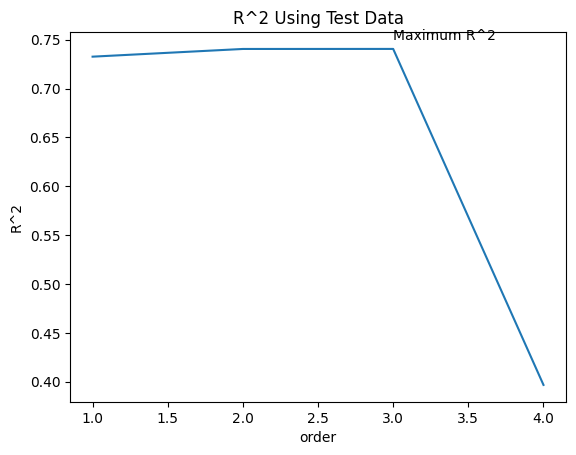

In [83]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial

Next, let's experiment with different polynomial orders and different amounts of data.

In [84]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

In [85]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [86]:
#Create a "PolynomialFeatures" object "pr1" of degree two
pr1  = PolynomialFeatures(degree= 2)

In [87]:
#Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size', and 'highway-mpg'
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
pr1

PolynomialFeatures()

In [88]:
#Find the dimensions for the new feature
x_test_pr1.shape

(91, 15)

New feature has 15 dimensions

In [89]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [90]:
yhat_test1 = poly1.predict(x_test_pr1)
yhat[0:5]

array([ 6722.97881798,  7301.51125999, 12214.21320532, 18901.4904913 ,
       20000.01535382])

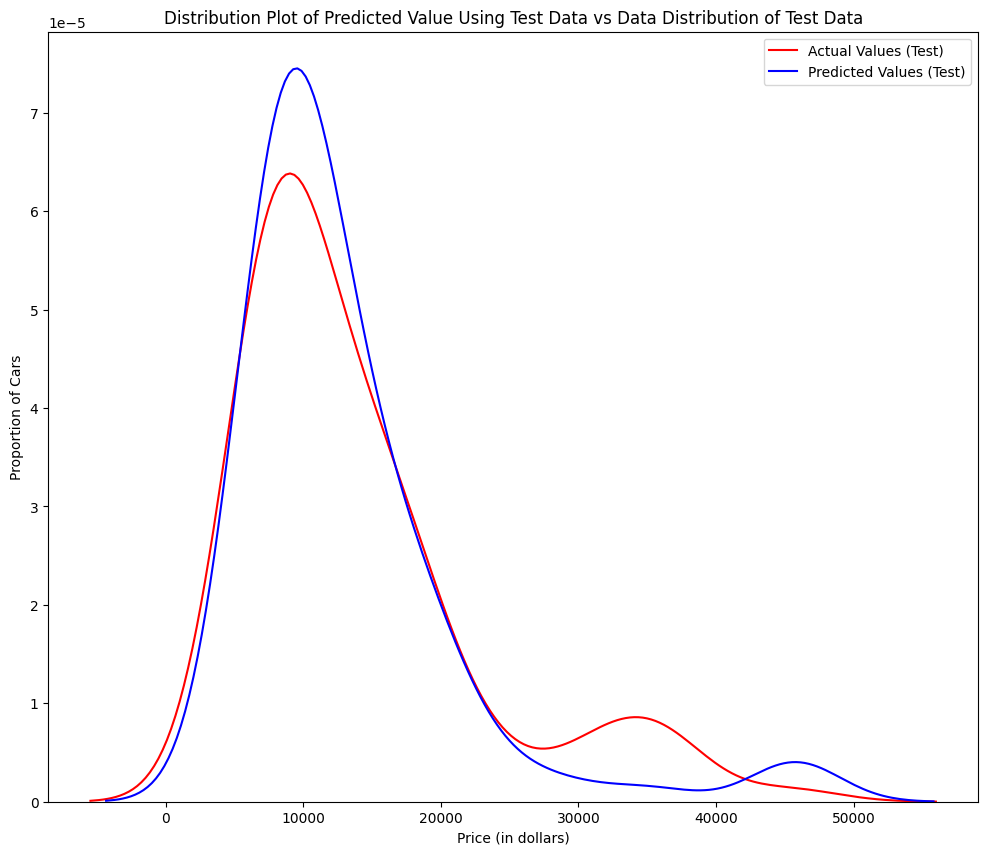

In [93]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

As the result, the predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

## Part 3: Ridge Regression

We will review Ridge Regression and see how the parameter alpha changes the model. Here, our test data will be used as validation data

In [94]:
#Perform a degree two polynomial transformation on our data
pr = PolynomialFeatures(degree= 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [95]:
from sklearn.linear_model import Ridge

In [96]:
#Create a Ridge regression object, setting the regularization parameter (alpha) to 1
RidgeModel = Ridge(alpha = 1)

In [97]:
#Fit the model using the method fit
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [98]:
#Obtain a prediction
yhat = RidgeModel.predict(x_test_pr)

In [99]:
#Compare the first four predicted samples to our test set:
print('predicted: ', yhat[0:4])
print('test set: ', y_test[0:4].values)

predicted:  [ 6577.53720013  9627.07836056 20940.46130682 19402.66018406]
test set:  [ 6295. 10698. 13860. 13499.]


In [100]:
#Looping to select the value of alpha that minimizes the test error
#Create a progress bar to see how many iterations we have completed
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|██████████| 1000/1000 [00:01<00:00, 638.39it/s, Test Score=0.564, Train Score=0.859]


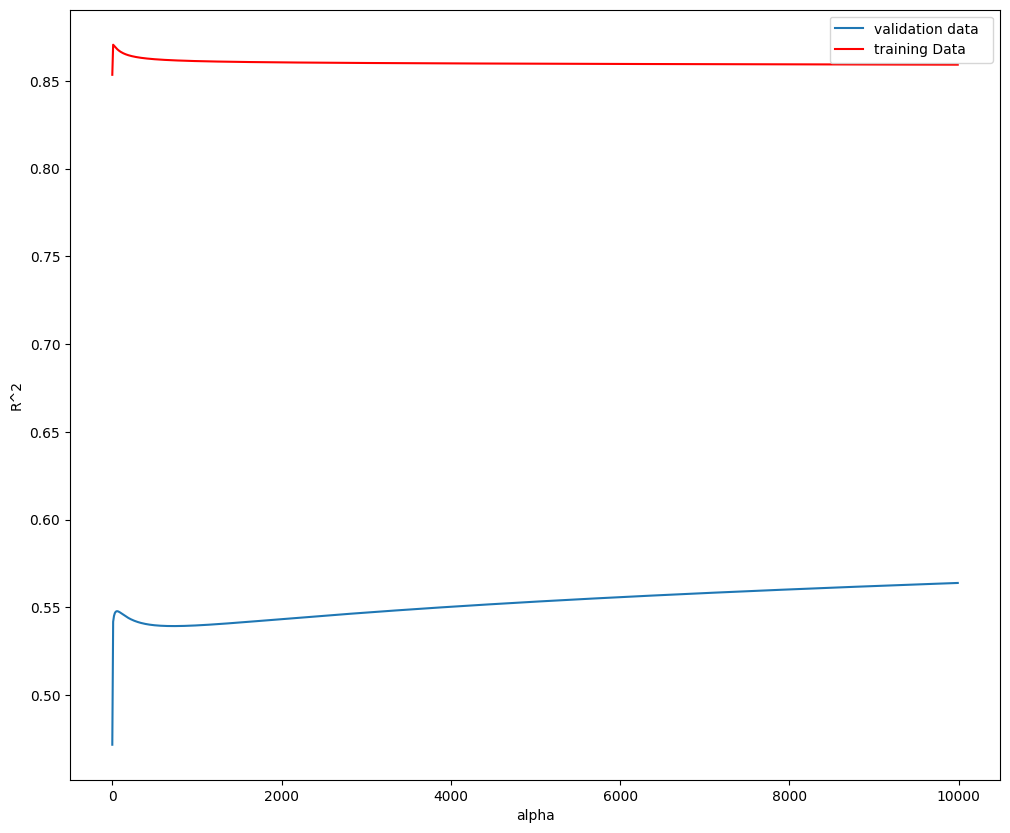

In [101]:
#Plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


## Part 4: Grid Search

Applying Grid Search to find the best hyperparameter

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
#Create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [104]:
#Create a Ridge regression object
RR = Ridge()
RR

Ridge()

In [105]:
#Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [106]:
#Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [107]:
#Find the best parameter
bestRR = Grid1.best_estimator_
bestRR

Ridge(alpha=10000)

In [108]:
#Test our model on the test data
bestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8412287494745088

In [109]:
#Perform a grid search for the alpha parameter and the normalization parameter
#Find the best values of the parameters
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000_000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv = 4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha= best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)